In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [20]:
# Load BMW Dataset
df = pd.read_csv('/content/bmw_stock_classification.csv')
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())

Dataset shape: (3000, 6)
Columns: ['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Label']
    Feature1   Feature2   Feature3   Feature4   Feature5  Label
0  37.454012  95.071431  73.199394  59.865848  15.601864    1.0
1  15.599452   5.808361  86.617615  60.111501  70.807258    1.0
2   2.058449  96.990985  83.244264  21.233911  18.182497    0.0
3  18.340451  30.424224  52.475643  43.194502  29.122914    1.0
4  61.185289  13.949386  29.214465  36.636184  45.606998    0.0


In [21]:
# Features and target
X = df[['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5']].values
y = df['Label'].astype(int).values  # ensure integer labels

In [22]:
# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=True
)

print("\nTraining set shape:", X_train.shape, "Testing set shape:", X_test.shape)


Training set shape: (2100, 5) Testing set shape: (900, 5)


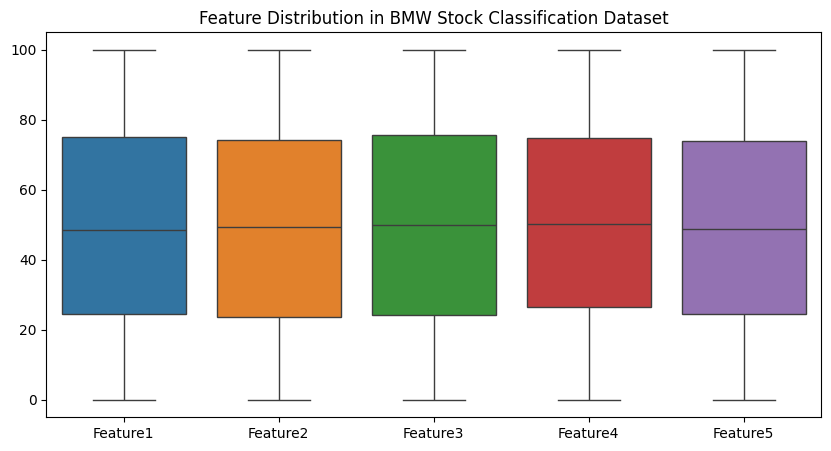

In [23]:
# Data visualization (basic EDA)
plt.figure(figsize=(10, 5))
sns.boxplot(data=df.drop('Label', axis=1))
plt.title("Feature Distribution in BMW Stock Classification Dataset")
plt.show()

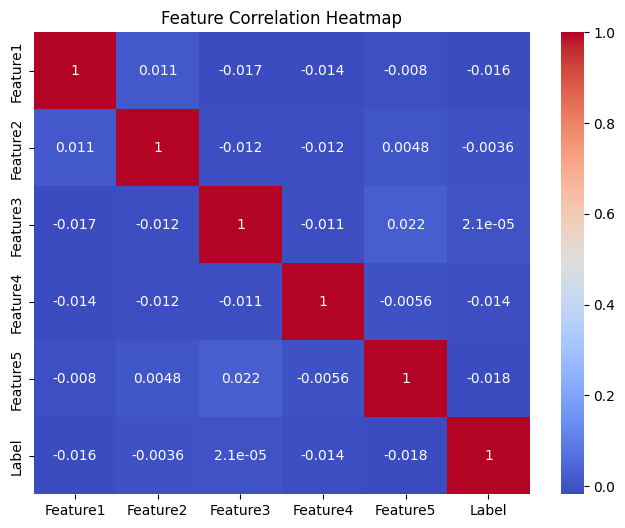

In [24]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [25]:
# Classifier selection
# clf = RandomForestClassifier(max_depth=4, random_state=42)
clf = LinearSVC(dual=False, max_iter=5000)

In [26]:
# Train classifier
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

In [27]:
# Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.20      0.28       458
           1       0.49      0.79      0.60       442

    accuracy                           0.49       900
   macro avg       0.49      0.50      0.44       900
weighted avg       0.49      0.49      0.44       900



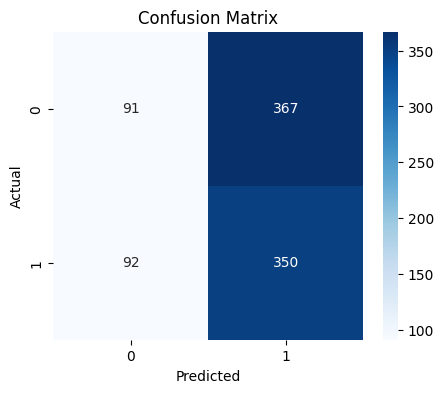

In [28]:
# Confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()